___
# Ciência dos Dados - PROJETO 1

## Vitor Leandro Pereira

## Qual o grau de escolaridade dos brasileiros, e qual a diferença entre a renda de pessoas escolarizadas e não  escolarizadas ?

___
## Introdução

optando o tema Escolaridade dos brasileiros, pretendo com este projeto analisar a partir de dados da PNAD2015, sobre informaçãoes de cada indivíduo se sabe ler e escrever, frequenta escola ou creche e que rede de ensino frequenta. E como se distribui a renda para pessoas que sabem ler e as que não sabem. 


___
## Filtros da base de dados

In [90]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [91]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Vitor Pereira\Documents\dp dados


In [92]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
valores=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [93]:
dados=pd.DataFrame({

    'Sabe_ler_e_escrever' :valores.V0601,
    'Frequenta_escola_ou_creche' :valores.V0602,
    'Rede_de_ensino' :valores.V6002,
    'renda' :valores.V4720,
    'idade':valores.V8005
    })



dados=dados[['Sabe_ler_e_escrever','Frequenta_escola_ou_creche','Rede_de_ensino','renda','idade']]

dados.Sabe_ler_e_escrever=dados.Sabe_ler_e_escrever.astype('category')
dados.Sabe_ler_e_escrever.cat.categories=('Sim','Não')

dados.Frequenta_escola_ou_creche=dados.Frequenta_escola_ou_creche.astype('category')
dados.Frequenta_escola_ou_creche.cat.categories=('Sim','Não')

def Rede(linha):
    if linha==2:
        return 'Pública'
    elif linha==4:
        return 'Privada'
    else:
        return 'nenhuma'
dados.Rede_de_ensino=dados.Rede_de_ensino.apply(Rede)


dados.head(10)

,Sabe_ler_e_escrever,Frequenta_escola_ou_creche,Rede_de_ensino,renda,idade
0,Sim,Não,nenhuma,800.0,23
1,Sim,Não,nenhuma,1150.0,23
2,Sim,Sim,Privada,880.0,35
3,Sim,Não,nenhuma,3000.0,34
4,Sim,Sim,Privada,0.0,11
5,Sim,Sim,Pública,NaN,7
6,Não,Sim,Pública,NaN,4
7,Sim,Não,nenhuma,880.0,18
8,Sim,Não,nenhuma,3500.0,46
9,Sim,Não,nenhuma,2300.0,81


Nessa primeira parte do código, criei e apliquei a função "Rede", para retornar na tabela a informação se a rede de ensino é "Pública", "Privada" ou "nenhuma".
Além disso, nessa primeira parte da análise, vou dar prioridade a uma análise qualitativa sobre a rede de ensino, a capacidade do indivíduo de ler e escrever, e se frequenta escola ou creche. Por isso decidi nao remover os indivíduos que nao revelaram sua renda, considerando que grande parte dos que frequentam escolas ou creches nçao possuem renda, pois isso poderia prejudicar a análise.

___
## Análise e Resultados

In [94]:
total1=dados.Sabe_ler_e_escrever.value_counts()
total1

Sim    303976
Não     52928
Name: Sabe_ler_e_escrever, dtype: int64

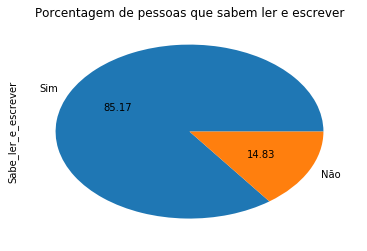

In [95]:
total1.plot(kind='pie',autopct="%0.2f")
plt.title('Porcentagem de pessoas que sabem ler e escrever')

O primeiro gráfico de análise qualitativa nos apresenta a porcentagem de pessoas que declararam saber ler e escrever na pesquisa, com 85.17% afirmando saber ler e escrever, e os outros 14.83% afirmando não saber.

In [96]:
total2=dados.Frequenta_escola_ou_creche.value_counts()
total2

Não    259388
Sim     97516
Name: Frequenta_escola_ou_creche, dtype: int64

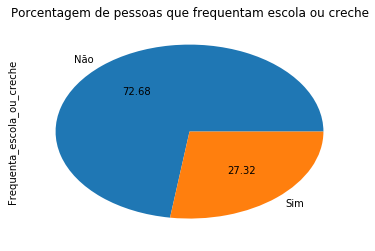

In [97]:
total2.plot(kind='pie',autopct="%0.2f")
plt.title('Porcentagem de pessoas que frequentam escola ou creche')

nessa segunda análise temos mais um gráfico de setores analisando agora a porcentagem de pessoas que declararam frequentar escola ou creche, com 27.32% afirmado frequentar, e 72.68% afirmado não frequentar. O que é totalemente compreensível tamanha disparidade, partindo do princípio que estão sento analisados todos os indivíduos que responderam a pesquisa.

In [98]:
total3=dados.Rede_de_ensino.value_counts()
total3

nenhuma    259388
Pública     72699
Privada     24817
Name: Rede_de_ensino, dtype: int64

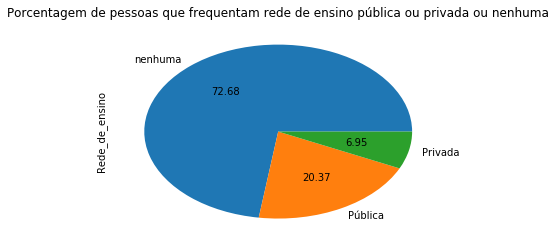

In [99]:
total3.plot(kind='pie', autopct="%0.2f")
plt.title('Porcentagem de pessoas que frequentam rede de ensino pública ou privada ou nenhuma')

Essa terceira análise representa a porcentagem referente aos indivíduos que freuetam rede de ensino oública privada ou nenhuma, temos entao, os mesmos 72.68% de pessoas que afirmaram nao frequentar escolas ou creches, agora como nenhuma rede de ensino. 20.37% afirmou frequentar rede de ensino pública, e os 6.95% restantes, declarou frequentar rede de ensino privada.

In [100]:
dados=dados[dados.idade>17]
dados=dados[dados.renda<5000]
dados.dropna()
dados.head(10)


,Sabe_ler_e_escrever,Frequenta_escola_ou_creche,Rede_de_ensino,renda,idade
0,Sim,Não,nenhuma,800.0,23
1,Sim,Não,nenhuma,1150.0,23
2,Sim,Sim,Privada,880.0,35
3,Sim,Não,nenhuma,3000.0,34
7,Sim,Não,nenhuma,880.0,18
8,Sim,Não,nenhuma,3500.0,46
9,Sim,Não,nenhuma,2300.0,81
10,Sim,Não,nenhuma,1990.0,71
11,Sim,Não,nenhuma,700.0,47
12,Sim,Não,nenhuma,0.0,24


Partindo para a segunda parte da análise, julguei que seria mais eficiente coletar dados sobre a renda de apenas das pessoas que tem 18 anos ou mais, que responderam a pesquisa. O fato de muitas crianças e adolecentes nao terem renda ou não declarar, poderia atrapalhar a análise.
Além disso afim de remover uma quantidade desnecessária de outliers, decidi restringir a renda para até 5.000 reais.

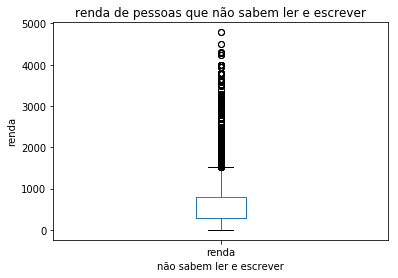

In [109]:
#plot = dados.renda.plot(kind='box',title='.')#, color='red')
#lista=["Sabe_ler_e_escrever","renda"]
boxsim=dados[(dados.Sabe_ler_e_escrever == "Sim")]
boxnao=dados[(dados.Sabe_ler_e_escrever == "Não")]

plot = boxnao.renda.plot(kind='box',title='.')#, color='red')
plot = boxnao.renda.plot(kind='box',title='.')#, color='red')

#result = boxsim.renda.append(boxnao.renda)

plt.ylabel('renda')
plt.xlabel('não sabem ler e escrever')
plt.title('renda de pessoas que não sabem ler e escrever')
plt.show()
#plot = boxsim.renda.plot(kind='box',title='.')#, color='red')
#plt.ylabel('renda')
#plt.xlabel('sabe ler e escrever')
#plt.title('renda de pessoas que sabem ler e escrever')
#plt.show()
#boxnao.renda

In [110]:
boxnao.describe()

,renda,idade
count,21432.000000,21432.000000
mean,708.777296,58.814296
std,506.793372,16.749069
min,0.000000,18.000000
25%,300.000000,47.000000
50%,788.000000,60.000000
75%,788.000000,71.000000
max,4788.000000,110.000000


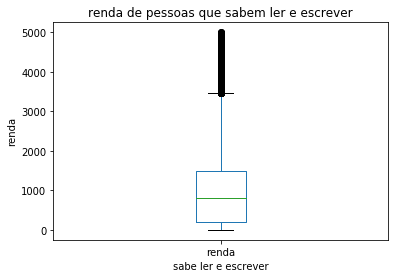

In [111]:
plot = boxsim.renda.plot(kind='box',title='.')#, color='red')
plt.ylabel('renda')
plt.xlabel('sabe ler e escrever')
plt.title('renda de pessoas que sabem ler e escrever')
plt.show()

In [112]:
boxsim.describe()

,renda,idade
count,224800.000000,224800.000000
mean,1041.142282,41.359346
std,971.001315,16.361430
min,0.000000,18.000000
25%,200.000000,28.000000
50%,800.000000,39.000000
75%,1500.000000,53.000000
max,4998.000000,115.000000


Nessa primeira análise quantitativa temos dois boxplots, o primeiro que analisa a renda de pessoas que não sabem ler e escrever, com uma média salarial de aproximadamente 708 reais, porém com alguma dificuldade de análise visual causada pelo excesso de outliers, pela grande quantidade de pessoas que declararam não saber ler e escrever.
Já segundo boxplot, temos a análise de renda de pessoas que sabem ler e escrever onde se pode tomar conclusões mais claras sobre as infrmações que o boxplot nos passa, os quartis, os limites, a mediana e os outliers, com média de aproximadamente 1041 reais.

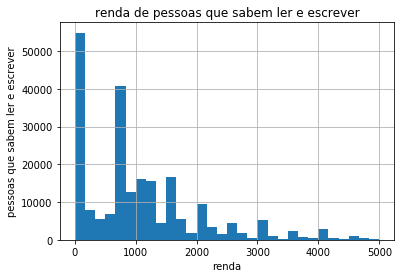

In [113]:
boxsim.hist(column="renda",bins=30)
plt.ylabel('pessoas que sabem ler e escrever')
plt.xlabel('renda')
plt.title('renda de pessoas que sabem ler e escrever')

Em mais uma análise quantitativa, podemos analisar visualmente em um histograma a renda das pessoas qua sabem ler e escrever, podemos perceber que existem dois pontos altos, o zero, por uma grande quantidade de pessoas que declarou ter renda zero,e a faixa perto de 800 reais que é representativa ao salário mínimo.

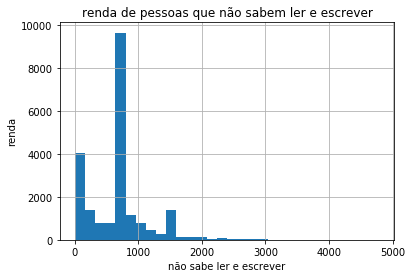

In [114]:
boxnao.hist(column="renda",bins=30)
plt.ylabel('renda')
plt.xlabel('não sabe ler e escrever')
plt.title('renda de pessoas que não sabem ler e escrever')

No histograma agora da renda de pessoas que não sabem ler e escrever, podemos perceber mais uma vez os pontos altos na faixa de zero reais, e de um salário mínimo.

___
## Conclusão 

A partir da análise quantitativa e qualitativa feita podem ser tomadas algumas conclusões. A primeira conclusão a ser tomada logo de cara é que existe uma discrepancia entre o salário de pessoas que sabem er e escrever e as que não sabem, um exemplo disso é o fato da média salarial de quem sabe ler e escrever é 50% maior do que quem não sabe.
Além disso, sabemos que 85% das pessoas que respondeu a pesquisa afirma saber ler e escrever, o que é um tanto quanto surpreendente devido a divulgação midiática sobre as taxas de analfabetismo no brasil.

A partir da análise de renda por aptidão de cada indivíduo a saber ler e escrever pudemos ter uma ideia de onde se localizam os parametros referentes a renda, como os quartis, os limites, a mediana e os outliers, de cada grupo.
Além do mais, na alálise quantitativa foi fundamental a utilizção de outro recurso visual para podermos perceber pontos altos no histograma, que representam a faixa salarial que apresenta maior índice de pessoas, sendo elas as faixa de zero reais, e de um salário mínimo (aproximadamente 954 reais).